# Linear Regression using Scikit-Learn

Finally, some good fucking food.
Black-boxing what we learned, because cutting corners is great! Or not reinventing the wheel, whatever.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import load_house_data
from lab_utils_common import dlc

np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

## Gradient Descent
`sklearn`'s built-in stochastic gradient descent is accessed from `sklearn.linear_model.SGD...`

It's got regression and classification, so that's neat!

Learning rate is decreased over time as you get closer and closer to optimal. Check it out through the Scikit-Learn docs.

It still performs best with normalized inputs, so that's on you, babe.

Or rather, on the `sklearn.preprocessing.StandardScaler` function.

In [3]:
# Data
X_train, y_train = load_house_data()
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

# Scaling
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

# Verification
print(f"PTP range by column (raw):\n{np.ptp(X_train, axis=0)}")
print(f"PTP range by column (std):\n{np.ptp(X_norm, axis=0)}")

# Regression model creation and fitting
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"Number of completed iterations: {sgdr.n_iter_}\nNumber of weight updates: {sgdr.t_}")

PTP range by column (raw):
[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
PTP range by column (std):
[5.85 6.14 2.06 3.69]
SGDRegressor()
Number of completed iterations: 125
Number of weight updates: 12376.0


Hey, look, once $\epsilon$ was small enough, it stopped updating early. Good work, huge library!

In [4]:
# Remember these are associated with X_norm specifically.
w_norm = sgdr.coef_
b_norm = sgdr.intercept_
print(f"Model params:\t\tw:{w_norm}\t\tb:{b_norm}")

Model params:		w:[110.15 -21.06 -32.47 -38.04]		b:[363.15]


...does that say price decreases somewhat with number of bedrooms and floors?

Well, with normalized, I guess?

Anyway, now we can make predictions.

In [5]:
# Predict using the method:
y_pred_sgdr = sgdr.predict(X_norm) # testing on training data isn't actually great though, right?
# Predict using the w, b vals directly:
y_pred = np.dot(X_norm, w_norm) + b_norm

print(f"These should match: {(y_pred_sgdr == y_pred).all()}")
print(f"Prediction on some inputs [0:4]:\n\t{y_pred[:4]}")
print(f"Target values:\n\t{y_train[:4]}")

These should match: True
Prediction on some inputs [0:4]:
	[295.19 485.88 389.59 492.04]
Target values:
	[300.  509.8 394.  540. ]


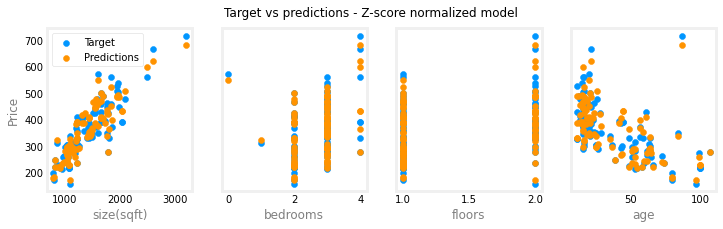

In [8]:
 # Plotting, scheming...
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label="Target")
    ax[i].set_xlabel(X_features[i], color="gray")
    ax[i].scatter(X_train[:,i], y_pred, color=dlc['dlorange'], label="Predictions")
ax[0].set_ylabel("Price", color="gray")
ax[0].legend()
fig.suptitle("Target vs predictions - Z-score normalized model")
plt.show()
